In [2]:
## Import pandas, numpy, matplotlib and seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import the data set 'MissingMigrants-Global-2019-03-29T18-36-07.csv'

In [5]:
data = 'MissingMigrants-Global-2019-03-29T18-36-07.csv'
df = pd.read_csv(data, index_col =0)
df = df.fillna(0)
df.head(5)

,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
Web ID,,,,,,,,,,,,,,,,,,,
51591,Mediterranean,"March 28, 2019",2019,Mar,0.0,2.0,2,36.0,0.0,2.0,0.0,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,0,Uncategorized,5
51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,0.0,4,11.0,3.0,0.0,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,0.0,1,0.0,0.0,0.0,0.0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,0.0,1,0.0,0.0,0.0,0.0,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
51587,Central America,"March 25, 2019",2019,Mar,1.0,0.0,1,0.0,0.0,1.0,0.0,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",0,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [6]:
## Conduct exploratory analysis on the data set df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5333 entries, 51591 to 39206
Data columns (total 19 columns):
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5333 non-null float64
Minimum Estimated Number of Missing    5333 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    5333 non-null float64
Number of Females                      5333 non-null float64
Number of Males                        5333 non-null float64
Number of Children                     5333 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5333 non-null object
Information Source                     5333 non-null object
Location Coordinates                   5333 

In [8]:
## Dropping unnecessary columns to create df1

In [9]:
df1 = df.drop(['Reported Date', 
               'Number Dead', 
               'Minimum Estimated Number of Missing', 
               'Information Source', 
               'Location Coordinates',
               'URL',
               'UNSD Geographical Grouping', 
               'Source Quality',
               'Number of Females',
               'Number of Males',
               'Number of Children'], axis=1)
df1.head(5)

,Region of Incident,Reported Year,Reported Month,Total Dead and Missing,Number of Survivors,Cause of Death,Location Description,Migration Route
Web ID,,,,,,,,
51591,Mediterranean,2019,Mar,2,36.0,Presumed drowning,"Off the coast of Chios, Greece",Eastern Mediterranean
51588,Mediterranean,2019,Mar,4,11.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Eastern Mediterranean
51589,Mediterranean,2019,Mar,1,0.0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...",Western Mediterranean
51590,Mediterranean,2019,Mar,1,0.0,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",Western Mediterranean
51587,Central America,2019,Mar,1,0.0,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico",0


In [49]:
df1.groupby('Reported Year')['Total Dead and Missing'].sum()

Reported Year
2015    6584
2016    8070
2017    6279
2018    4734
Name: Total Dead and Missing, dtype: int64

In [11]:
## I'm interested in comparing data from 2015-2018, so I'll drop 2014 and 2019 data

In [40]:
df1 = df1[df1['Reported Year'] != 2014]
df1 = df1[df1['Reported Year'] != 2019]
df2 = df1.groupby('Reported Year')['Total Dead and Missing'].sum()  
df2

Reported Year
2015    6584
2016    8070
2017    6279
2018    4734
Name: Total Dead and Missing, dtype: int64

In [13]:
## Plot1: Total number of dead and missing migrants between 2015 - 2018.
### This plot shows the total number of Dead and Missing Immigrants from 2015 to 2018. 
### As we can see from the plot below, the number of dead and missing immigrants decreases over the year.
### There was a peak between 2015 and 2016, but after that, the trend generally started to decrease.

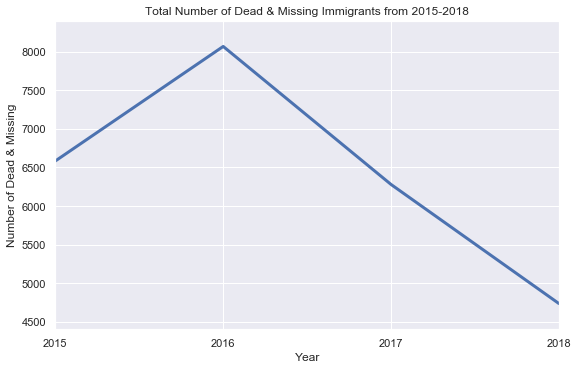

In [36]:
sns.set(style="darkgrid")

plt.figure(figsize=(8,5))
plt.plot(df2, linewidth=3)
plt.xticks([2015, 2016, 2017, 2018])
plt.margins(x=0.0, y=0.1)
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Number of Dead & Missing')
plt.title('Total Number of Dead & Missing Immigrants from 2015-2018')

plt.show()

In [15]:
## Plot2: Number of incidents by Region. 
### The second plot describes the number of Dead and Missing Migrants by different Regions. As we can see from 
### the bar chart, most incidents derived from migrants from the Mediterranean with 14,635 cases between 2015-2018.
### North Africa came second with 3,909 cases and US-Mexico border came third with almost 1,600 incidents.  

In [54]:
df3 = df1.groupby('Region of Incident')['Total Dead and Missing'].sum()  
df3

Region of Incident
Caribbean               394
Central America         460
Central Asia             52
East Asia                22
Europe                  413
Horn of Africa          817
Mediterranean         14635
Middle East             357
North Africa           3909
North America             1
South America            65
South Asia              284
Southeast Asia         1379
Sub-Saharan Africa     1281
US-Mexico Border       1598
Name: Total Dead and Missing, dtype: int64

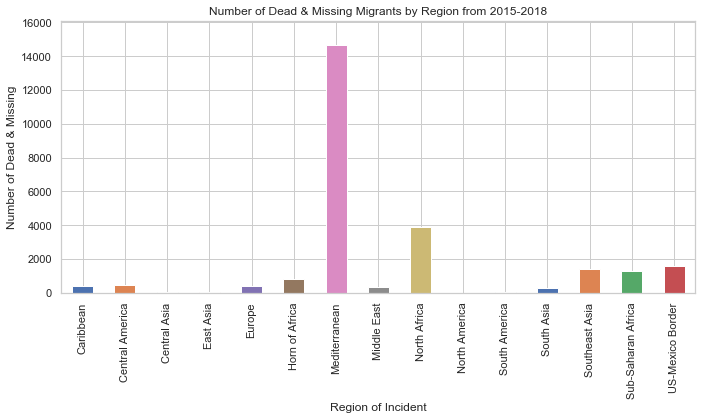

In [55]:
sns.set(style="whitegrid")

df3.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of Dead & Missing')
plt.title('Number of Dead & Missing Migrants by Region from 2015-2018')
plt.margins(x=0.0, y=0.1, tight=True)
plt.tight_layout()

plt.show()

In [18]:
## Plot3: Number of Dead & Missing Migrants by Males, Females and Chrildren
### Plot 3 shows the number of Dead & Missing Migrants between 2015-2018 separated by M3 categories: males, females and chrildren
### As we can see from the 3 charts, males represented the largest number of dead & missing migrants, followed by females and children
### The general trend, however, increases significantly for all groups over the year.

In [19]:
df4 = pd.DataFrame()
df4['Reported Year']= df['Reported Year']
df4['Number of Males']= df['Number of Males']
df4['Number of Females']= df['Number of Females']
df4['Number of Children'] = df['Number of Children']
df4 = df4[df4['Reported Year'] != 2019]
df4 = df4[df4['Reported Year'] != 2014]
df4.head(5)

,Reported Year,Number of Males,Number of Females,Number of Children
Web ID,,,,
48115,2018,0.0,0.0,0.0
48089,2018,1.0,1.0,1.0
48090,2018,0.0,0.0,0.0
48087,2018,0.0,0.0,0.0
48088,2018,1.0,0.0,0.0


In [20]:
df5 = df4.groupby('Reported Year').sum()
df5

,Number of Males,Number of Females,Number of Children
Reported Year,,,
2015,797.0,216.0,291.0
2016,890.0,282.0,268.0
2017,1614.0,546.0,308.0
2018,1715.0,655.0,397.0


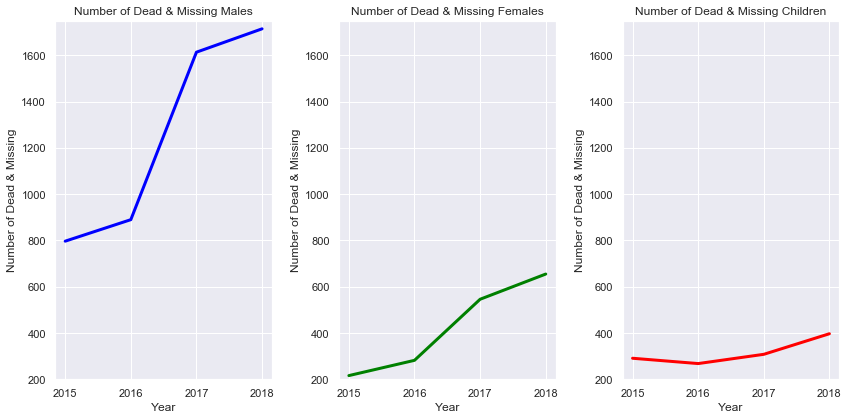

In [21]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
plt.margins(x=0.0, y=0.1, tight=True)

plt.subplot(1, 3, 1)
plt.plot(df5['Number of Males'], c='blue', linewidth=3)
plt.ylim((200,1750))
plt.xlabel('Year')
plt.ylabel('Number of Dead & Missing')
plt.title('Number of Dead & Missing Males')

plt.subplot(1, 3, 2)
plt.plot(df5['Number of Females'], c='green', linewidth=3)
plt.ylim((200,1750))
plt.xlabel('Year')
plt.ylabel('Number of Dead & Missing')
plt.title('Number of Dead & Missing Females')

plt.subplot(1, 3, 3)
plt.plot(df5['Number of Children'], c='red', linewidth=3)
plt.ylim((200,1750))
plt.xlabel('Year')
plt.ylabel('Number of Dead & Missing')
plt.title('Number of Dead & Missing Children')

plt.tight_layout()
plt.show()

In [22]:
## Plot4: Comparison between the number of survivors and the number of Dead & Missing
### This plot compares the total number of dead & missing immigrants to the total number of survivors from 2015-2018.
### In general, the number of survivors exceeds the number of dead & missing immigrants.

In [30]:
df6= pd.DataFrame()
df6['Reported Year']= df['Reported Year']
df6['Total Dead and Missing']= df['Total Dead and Missing']
df6['Total Number of Survivors']= df['Number of Survivors']
df6 = df6[df6['Reported Year'] != 2019]
df6 = df6[df6['Reported Year'] != 2014]
df6.head()

,Reported Year,Total Dead and Missing,Total Number of Survivors
Web ID,,,
48115,2018,1,0.0
48089,2018,2,9.0
48090,2018,14,12.0
48087,2018,7,1.0
48088,2018,1,0.0


In [42]:
df7 =df6.groupby('Reported Year').sum()
df7

,Total Dead and Missing,Total Number of Survivors
Reported Year,,
2015,6584,8115.0
2016,8070,17407.0
2017,6279,6424.0
2018,4734,9167.0


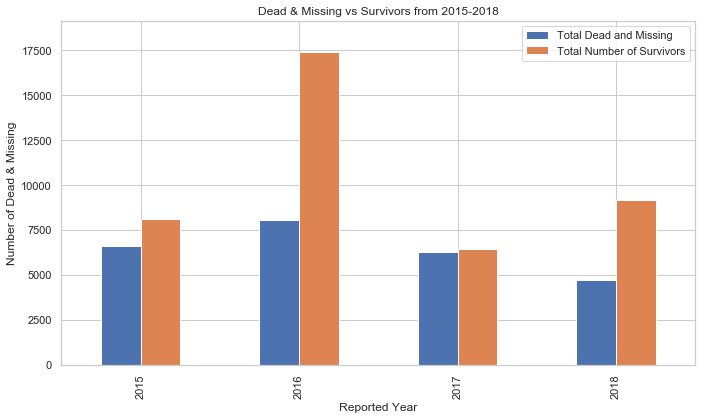

In [32]:
sns.set(style='whitegrid')

df7.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of Dead & Missing')
plt.title('Dead & Missing vs Survivors from 2015-2018')
plt.margins(x=0.0, y=0.1, tight=True)
plt.tight_layout()

plt.show()